<a href="https://colab.research.google.com/github/abhinavdayal/EIP_Session3/blob/master/Attempt10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten, Dense
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 

TensorFlow 2.x selected.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
train_features.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
num_train, img_rows, img_cols, img_channels  =  train_features.shape
num_test, _, _, _ =  test_features.shape
labels = np.unique(train_labels)
num_classes = len(labels)
print(num_classes)

10


In [4]:
# ids of all rows in train data which has label of 0
x = np.random.choice(np.where(train_labels[:]==0)[0], 10, replace=False)
train_features[x[0]]

array([[[136, 144, 166],
        [143, 149, 170],
        [153, 157, 178],
        ...,
        [156, 168, 185],
        [140, 155, 174],
        [121, 135, 161]],

       [[149, 158, 180],
        [151, 158, 178],
        [155, 162, 181],
        ...,
        [139, 152, 171],
        [125, 140, 160],
        [109, 124, 151]],

       [[147, 158, 179],
        [156, 165, 185],
        [167, 175, 194],
        ...,
        [128, 143, 164],
        [119, 135, 157],
        [107, 123, 151]],

       ...,

       [[130, 126, 148],
        [127, 120, 141],
        [130, 123, 141],
        ...,
        [162, 152, 160],
        [147, 142, 153],
        [131, 131, 149]],

       [[111,  99, 116],
        [120, 105, 120],
        [122, 111, 125],
        ...,
        [158, 150, 163],
        [144, 139, 155],
        [137, 134, 154]],

       [[ 87,  59,  66],
        [122,  84,  72],
        [108,  75,  70],
        ...,
        [163, 152, 167],
        [148, 140, 154],
        [140, 134, 153]]

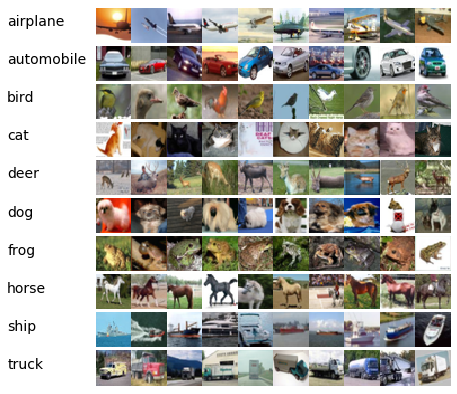

In [5]:
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(train_labels[:]==i)[0], 10, replace=False)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, 11):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(train_features[idx[j-1]], interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    acc = float(num_correct)/result.shape[0]
    return (acc * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [12]:
# Define the model, Since image size is already small we wont use stride > 1.
# we have to use only separatble convolution
model = keras.Sequential()

# rin=1, nin = 32x32, cin= 3, jin=1, k=3, p=1, s=1, jout=1, rout=3, nout=32x32, cout=16
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same', depth_multiplier=1, input_shape=(32, 32, 3), use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=3, nin = 32x32, cin=16, jin=1, k=3, p=1, s=1, jout=1, rout=5, nout=32x32, cout=16
model.add(SeparableConv2D(filters=16, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=5, nin = 32x32, cin=32, jin=1, k=3, p=1, s=1, jout=1, rout=7, nout=32x32, cout=32
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=5, nin = 32x32, cin=32, jin=1, k=3, p=1, s=1, jout=1, rout=9, nout=32x32, cout=48
model.add(SeparableConv2D(filters=48, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))


# rin=8, nin = 32x32, cin= 48, jin=2, k=3, p=1, s=1, jout=1, rout=11, nout=32x32, cout=64
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=16, nin = 32x32, cin=64, jin=1, k=2, p=1, s=2, jout=2, rout=12, nout=8x8, cout=64
model.add(MaxPooling2D())

# rin=12, nin = 16x16, cin= 64, jin=2, k=3, p=1, s=1, jout=2, rout=16, nout=16x16, cout=64
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=12, nin = 8x8, cin= 64, jin=2, k=3, p=1, s=1, jout=2, rout=20, nout=8x8, cout=96
model.add(SeparableConv2D(filters=96, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=18, nin = 8x8, cin= 96, jin=4, k=3, p=1, s=1, jout=4, rout=24, nout=6x6, cout=128
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=18, nin = 6x6, cin= 128, jin=4, k=3, p=1, s=1, jout=4, rout=28, nout=4x4, cout=192
model.add(SeparableConv2D(filters=192, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))


# rin=26, nin = 4x4, cin= 192, jin=4, k=3, p=1, s=1, jout=4, rout=32, nout=2x2, cout=10 Cfar_10 has 10 classes
model.add(SeparableConv2D(filters=num_classes, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output size = 1x1x10
model.add(GlobalAveragePooling2D())
model.add(Flatten()) # 10x1
model.add(Activation('softmax')) # get probabilities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_20 (Separab (None, 32, 32, 16)        75        
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
separable_conv2d_21 (Separab (None, 32, 32, 16)        400       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 16)       

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

#datagen.fit(train_features)

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = (train_features.shape[0]//128), epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))



Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/50
390/390 [==============================] - 68s 174ms/step - loss: 1.6624 - accuracy: 0.4047 - val_loss: 4.0710 - val_accuracy: 0.2980

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0075815011.
Epoch 2/50
390/390 [==============================] - 68s 175ms/step - loss: 1.3280 - accuracy: 0.5323 - val_loss: 3.6692 - val_accuracy: 0.3299

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0061050061.
Epoch 3/50
390/390 [==============================] - 68s 173ms/step - loss: 1.1591 - accuracy: 0.5946 - val_loss: 1.6011 - val_accuracy: 0.5733

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005109862.
Epoch 4/50
390/390 [==============================] - 68s 173ms/step - loss: 1.0517 - accuracy: 0.6345 - val_loss: 1.4119 - val_accuracy: 0.5705

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0043936731.
Epoch 5/50
390/390 [=============================

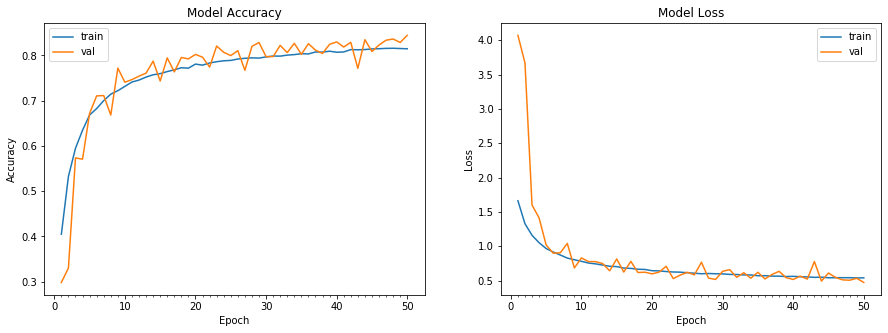

Accuracy on test data is: 84.42


In [16]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
#test_iterator = datagen.flow(test_features, test_labels, batch_size=64)
#_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=1)
#print('Test Accuracy: %.3f' % (acc * 100))